## 1st Deliverable

## Betelihem Lakew
### On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
dsports=pd.read_excel("train_test_dataset.xlsx")
dsports.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [4]:
dsports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


* The above Data information shows that there are some missing values (CHILD & SPORT), we also see that some data types are in string(object) format this will make our Analysis inacurate or bring some wrong info. So the first step in our Analyzation process is cleaning the data.

### Data cleaning

In [5]:
dsports = dsports.replace({'AGE': ' '}, {'AGE': 0})
dsports.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,0,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [6]:
dsports = dsports.drop('SPORT', axis = 1)
dsports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 18 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null int64
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: int64(12), object(6)
memory usage: 1.3+ MB


In [7]:
dsports = dsports.drop('CHILD', axis = 1)
dsports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 17 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null int64
INCOME      9216 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: int64(12), object(5)
memory usage: 1.2+ MB


In [8]:
dsports = dsports.drop('GNDR', axis = 1)
dsports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null int64
INCOME      9216 non-null object
OWNHOME     9216 non-null object
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: int64(12), object(4)
memory usage: 1.1+ MB


In [9]:
dsports = dsports.drop('OWNHOME', axis = 1)
dsports.head()

               

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,0,,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,65,194


In [10]:
dsports = dsports.drop('COMP', axis = 1)
dsports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 14 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null int64
INCOME      9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: int64(12), object(2)
memory usage: 1008.1+ KB


In [11]:
dsports.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,0,,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,65,194


In [12]:
dsports.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,PCTMARR,HOMEVAL
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,48.116428,58.228516,112.111220
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,29.235460,12.902173,92.292223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,33.000000,52.000000,56.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,54.000000,61.000000,81.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,72.000000,67.000000,132.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,97.000000,99.000000,600.000000


In [13]:
dsports.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.030358,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.035950,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.032728,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.053437,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.098230,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.082640,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,0.001685,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.205889,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.107669,0.032558,-0.064727
AGE,-0.030358,0.035950,-0.032728,-0.053437,0.098230,0.082640,0.001685,0.205889,0.107669,1.000000,0.020758,-0.000994


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000120D8B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013492128>]], dtype=object)

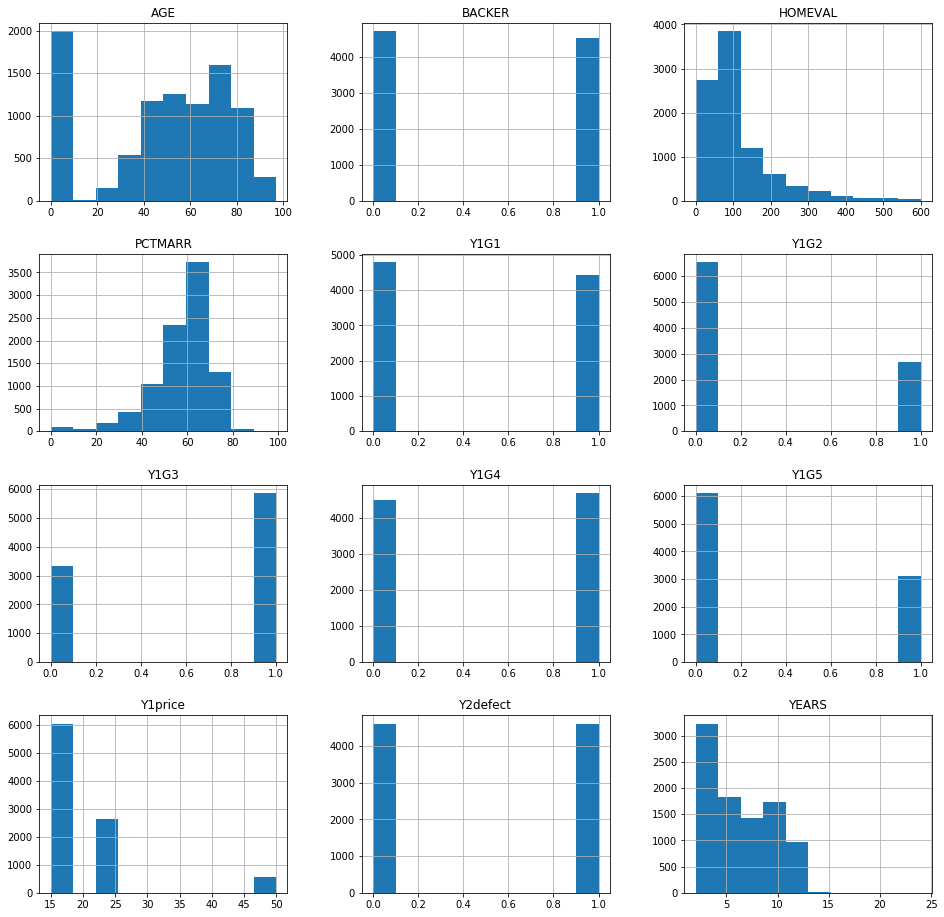

In [14]:
dsports.hist(figsize=(16,16))


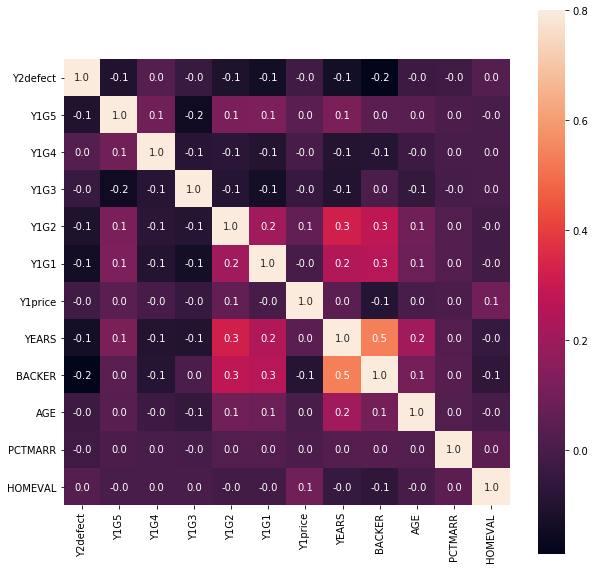

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(dsports.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [16]:
dsports.groupby('BACKER').count()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,AGE,INCOME,PCTMARR,HOMEVAL
BACKER,,,,,,,,,,,,,
0,4705,4705,4705,4705,4705,4705,4705,4705,4705,4705,4705,4705,4705
1,4511,4511,4511,4511,4511,4511,4511,4511,4511,4511,4511,4511,4511


In [17]:
dsports.groupby('INCOME').count()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,PCTMARR,HOMEVAL
INCOME,,,,,,,,,,,,,
0,875,875,875,875,875,875,875,875,875,875,875,875,875
1,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287
2,853,853,853,853,853,853,853,853,853,853,853,853,853
3,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
4,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557
5,763,763,763,763,763,763,763,763,763,763,763,763,763
6,704,704,704,704,704,704,704,704,704,704,704,704,704
,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944


In [18]:
dsports.groupby('YEARS').count()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,BACKER,AGE,INCOME,PCTMARR,HOMEVAL
YEARS,,,,,,,,,,,,,
2,245,245,245,245,245,245,245,245,245,245,245,245,245
3,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864
4,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122
5,835,835,835,835,835,835,835,835,835,835,835,835,835
6,987,987,987,987,987,987,987,987,987,987,987,987,987
7,864,864,864,864,864,864,864,864,864,864,864,864,864
8,570,570,570,570,570,570,570,570,570,570,570,570,570
9,887,887,887,887,887,887,887,887,887,887,887,887,887
10,846,846,846,846,846,846,846,846,846,846,846,846,846


In [20]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

In [21]:
Defect = dsports[dsports['BACKER'] == 1] ['Y1G2']
noDefect = dsports[dsports['BACKER'] == 0] ['Y1G2']

f_val, p_val = stats.f_oneway(Defect, noDefect)

f_val, p_val

(762.92417802768, 2.0541013060070868e-161)

* The assumption that The membership at Backer's club doesn't play any rule in fans defecting in second year is rejected in the above Hypothesis test

In [22]:
Defect = dsports[dsports['BACKER'] == 1] ['Y1G3']
noDefect = dsports[dsports['BACKER'] == 0] ['Y1G3']

f_val, p_val = stats.f_oneway(Defect, noDefect)

f_val, p_val

(0.25964439336052242, 0.61037676999211676)

* The assumption that The membership at Backer's club doesn't play any rule in fans defecting in third year is accepted in the above Hypothesis test

# Model Development

In [23]:
y = dsports['Y2defect']
X = dsports[['BACKER', 'YEARS']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.59349005425
[[1048  315]
 [ 809  593]]
             precision    recall  f1-score   support

          0       0.56      0.77      0.65      1363
          1       0.65      0.42      0.51      1402

avg / total       0.61      0.59      0.58      2765

0.595929669699


## Model Deployment & Prepare Entry Data

In [27]:
dsports2 = pd.read_excel("validation_dataset.xlsx")
dsports2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


The column names of validation dataset must be same as those of the training-testing dataset.

In [28]:
dsports2 = dsports2.drop('CHILD', axis=1)
dsports2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,1,1,0.0,,65,110


In [29]:
dsports2 = dsports2.drop('GNDR', axis=1)
dsports2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,1,0.0,,65,110


In [30]:
dsports2 = dsports2.drop('OWNHOME', axis=1)
dsports2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,0.0,,65,110


In [31]:
dsports2 = dsports2.drop('SPORT', axis=1)
dsports2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,,65,110


In [32]:
dsports2 = dsports2.drop('COMP', axis=1)
dsports2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,65,110


In [33]:
dsports2 = dsports2.replace({'INCOME': ' '}, {'INCOME': 0})
dsports2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,65,110


In [34]:
dsports2 = dsports2.replace({'AGE': np.nan}, {'AGE': 0})
dsports2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,0.0,0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,65,110


In [35]:
dsports2['AGE'] = dsports2['AGE'].astype(int)
print dsports2.dtypes

FAKEID       object
Y3defect    float64
Y2G5          int64
Y2G4          int64
Y2G3          int64
Y2G2          int64
Y2G1          int64
Y2price       int64
YEARS         int64
BACKER        int64
AGE           int32
INCOME        int64
PCTMARR       int64
HOMEVAL       int64
dtype: object


In [36]:
dsports2 = dsports2.rename (columns={'Y2price' : 'Y1price'})
dsports2.head(2)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49,4,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84,5,67,128


In [37]:
validation = dsports2[['BACKER', 'YEARS']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 2 columns):
BACKER    9542 non-null int64
YEARS     9542 non-null int64
dtypes: int64(2)
memory usage: 149.2 KB


In [38]:
fakeid = pd.DataFrame(dsports2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [40]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

In [41]:
output_scoring = dt.predict(validation)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
predicted_y

,Predicted Defect
0,0
1,0
2,0
3,1
4,0
5,1
6,0
7,1
8,0
9,0


In [42]:
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

In [43]:
risky_fans = fakeid.join(probs)

In [44]:
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

In [45]:
risky_fans.to_csv("submissionentry.csv", index=False)